In [1]:
#import required packages
#basics
import pandas as pd 
import numpy as np

#misc
import gc
import time
import warnings
warnings.filterwarnings("ignore")

#stats
#from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
color = sns.color_palette()
sns.set_style("dark")
%matplotlib inline

from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
#import matplotlib_venn as venn

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.tokenize import word_tokenize,sent_tokenize


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

import  textblob
from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import Word


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amans\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
Data=pd.read_excel("Womens Clothing Reviews Data.xlsx")

In [3]:
 Data.isna().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [4]:
 Data.sample(10,random_state=20)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
1456,411,Initmates,Intimate,Intimates,Mumbai,Mobile,38,Too tight and too big at the same time.,"I'm a 32-a, and i bought a small. i found that...",3,1
12306,569,General,Trend,Trend,Gurgaon,Web,53,Pretty bad in real life,"When i unwrapped this a chemical ""stink"" hit m...",1,0
16973,1095,General,Dresses,Dresses,Gurgaon,Web,33,NaN,NaN,5,1
3861,1081,General Petite,Dresses,Dresses,Mumbai,Web,39,Material is amazing,"I am in love with this dress. it's super soft,...",5,1
11311,986,General,Jackets,Jackets,Gurgaon,Web,57,Not a kimono.,This is not a kimono. it's a cocoon. there's a...,1,0
731,886,General Petite,Tops,Knits,Mumbai,Web,25,Great casual shirt,Absolutely in love with this shirt. the neckli...,4,1
21012,895,General Petite,Tops,Fine gauge,Mumbai,Web,63,NaN,Purchased this in the blue color in the store ...,5,1
9450,885,General,Tops,Knits,Mumbai,Web,30,Not as pictured,This top hit at my hips not as it appears on t...,3,0
9259,1086,General,Dresses,Dresses,Mumbai,Web,52,NaN,Great fabric. soft and easy to wear and goes f...,5,1
4542,820,General,Tops,Blouses,Mumbai,Mobile,55,NaN,I fell in love with this shirt the moment i sa...,2,0


In [5]:
data=Data.copy()

In [7]:
data.sort_index()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [6]:
data["Reviews_whole"] = data["Review Title"] + "" + data["Review Text"]

In [7]:
data.dropna(subset=["Reviews_whole"],inplace=True)

In [8]:
data.shape

(19675, 12)

In [9]:
data.isna().sum()

Product ID         0
Category          13
Subcategory1      13
SubCategory2      13
Location           0
Channel            0
Customer Age       0
Review Title       0
Review Text        0
Rating             0
Recommend Flag     0
Reviews_whole      0
dtype: int64

In [10]:
data.drop(columns=["Review Text","Review Title"],inplace=True)

In [11]:
data.reset_index(inplace=True)

In [12]:
data

,index,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Rating,Recommend Flag,Reviews_whole
0,2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,Some major design flawsI had such high hopes f...
1,3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,"My favorite buy!I love, love, love this jumpsu..."
2,4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,Flattering shirtThis shirt is very flattering ...
3,5,1080,General,Dresses,Dresses,Gurgaon,Web,49,2,0,Not for the very petiteI love tracy reese dres...
4,6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,5,1,Cagrcoal shimmer funI aded this in my basket a...
...,...,...,...,...,...,...,...,...,...,...,...
19670,23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,5,1,Great dress for many occasionsI was very happy...
19671,23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,3,1,Wish it was made of cottonIt reminds me of mat...
19672,23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,3,0,"Cute, but see throughThis fit well, but the to..."
19673,23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,3,1,"Very cute dress, perfect for summer parties an..."


In [13]:
data["Category"].value_counts()

General           11664
General Petite     6778
Initmates          1220
Name: Category, dtype: int64

In [14]:
data.columns[data.columns!='Reviews_whole']

Index(['index', 'Product ID', 'Category', 'Subcategory1', 'SubCategory2',
       'Location', 'Channel', 'Customer Age', 'Rating', 'Recommend Flag'],
      dtype='object')

In [15]:
data.columns = [column.strip() for column in data.columns]

In [16]:
data["SubCategory2"].value_counts()

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: SubCategory2, dtype: int64

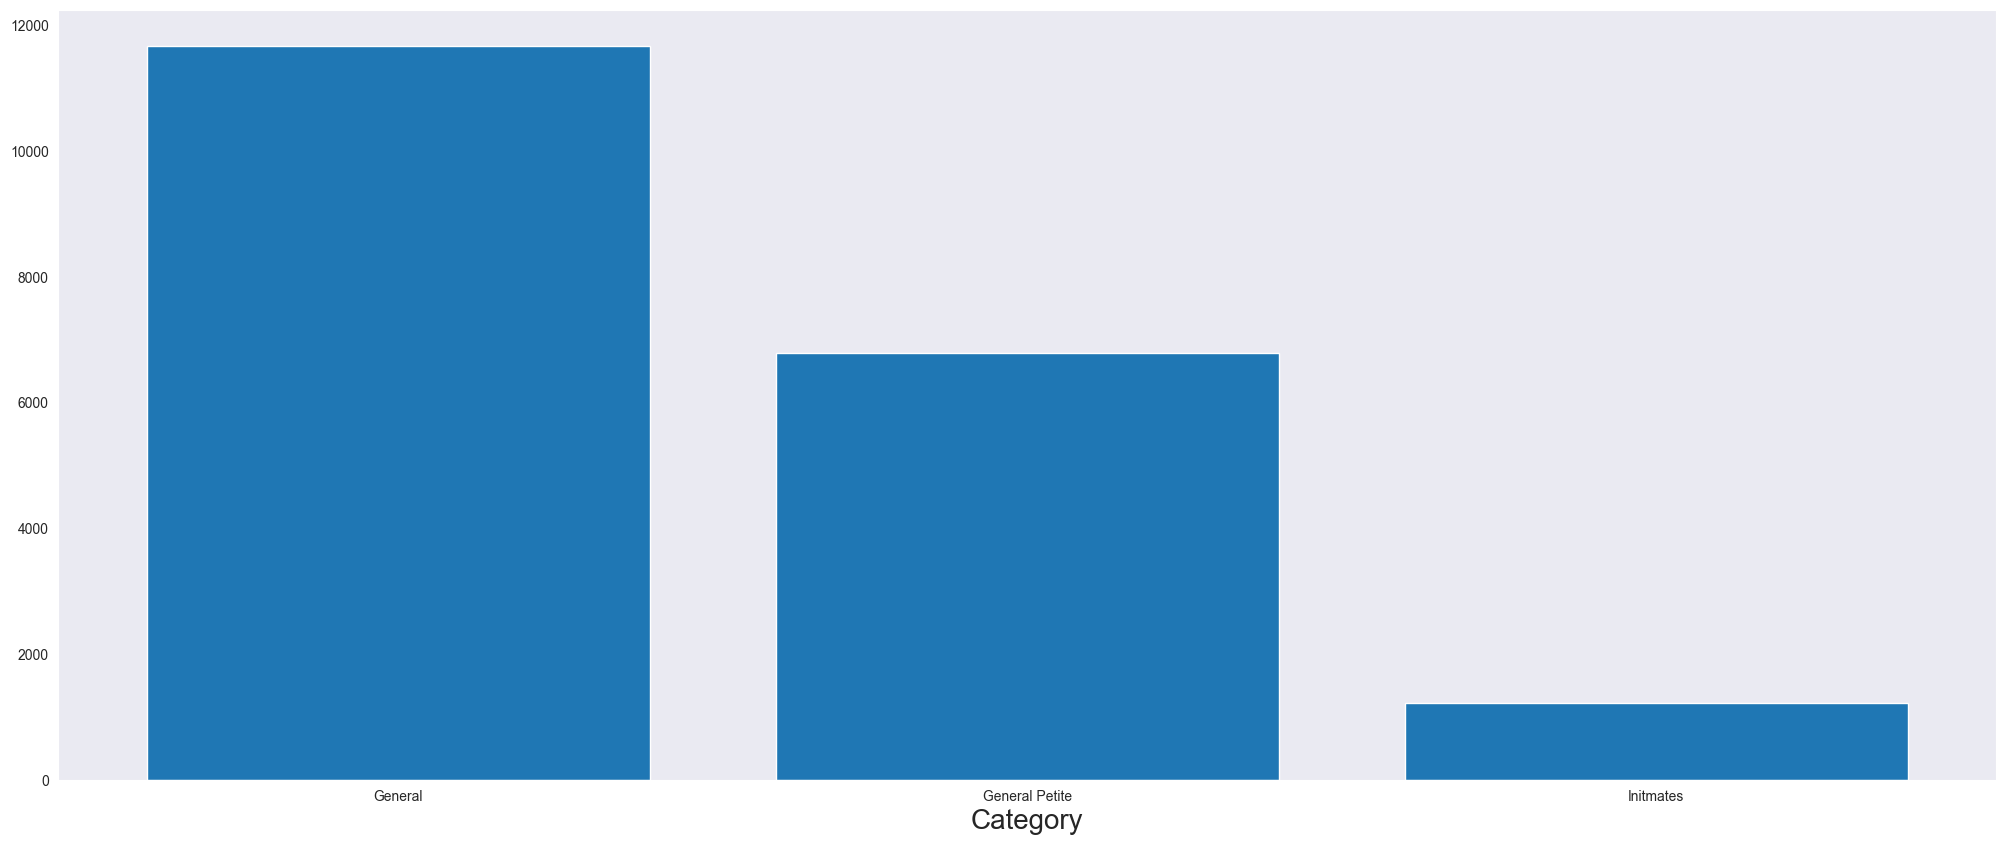

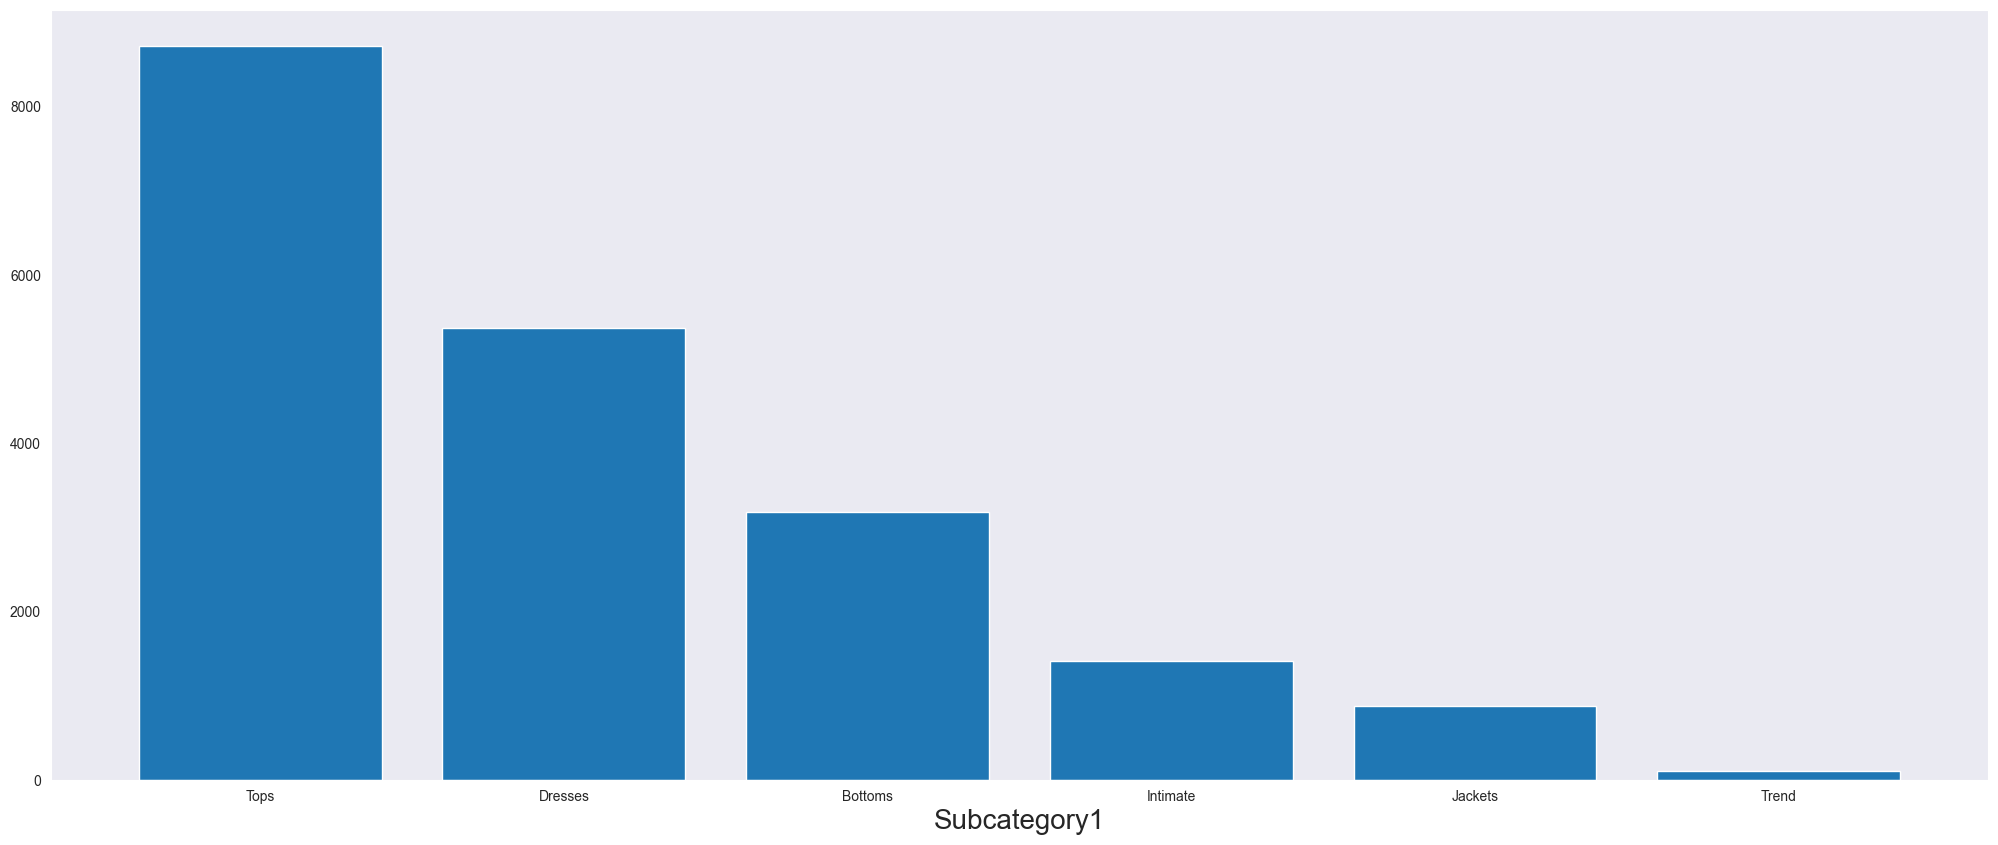

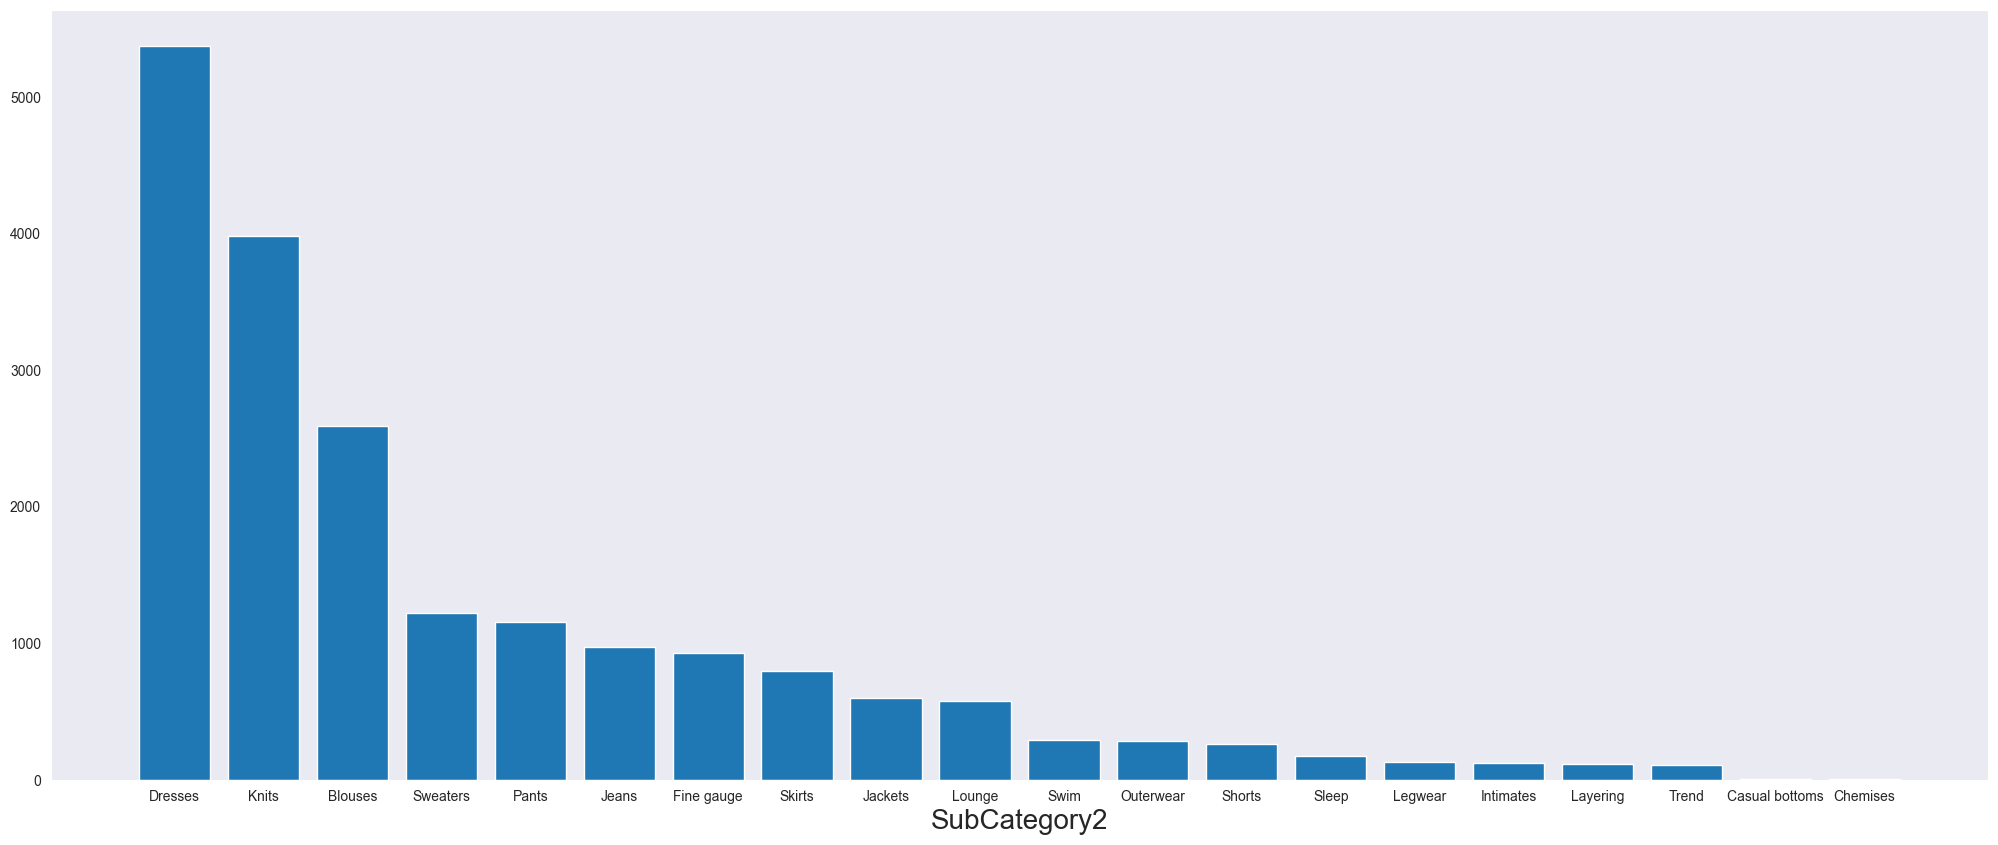

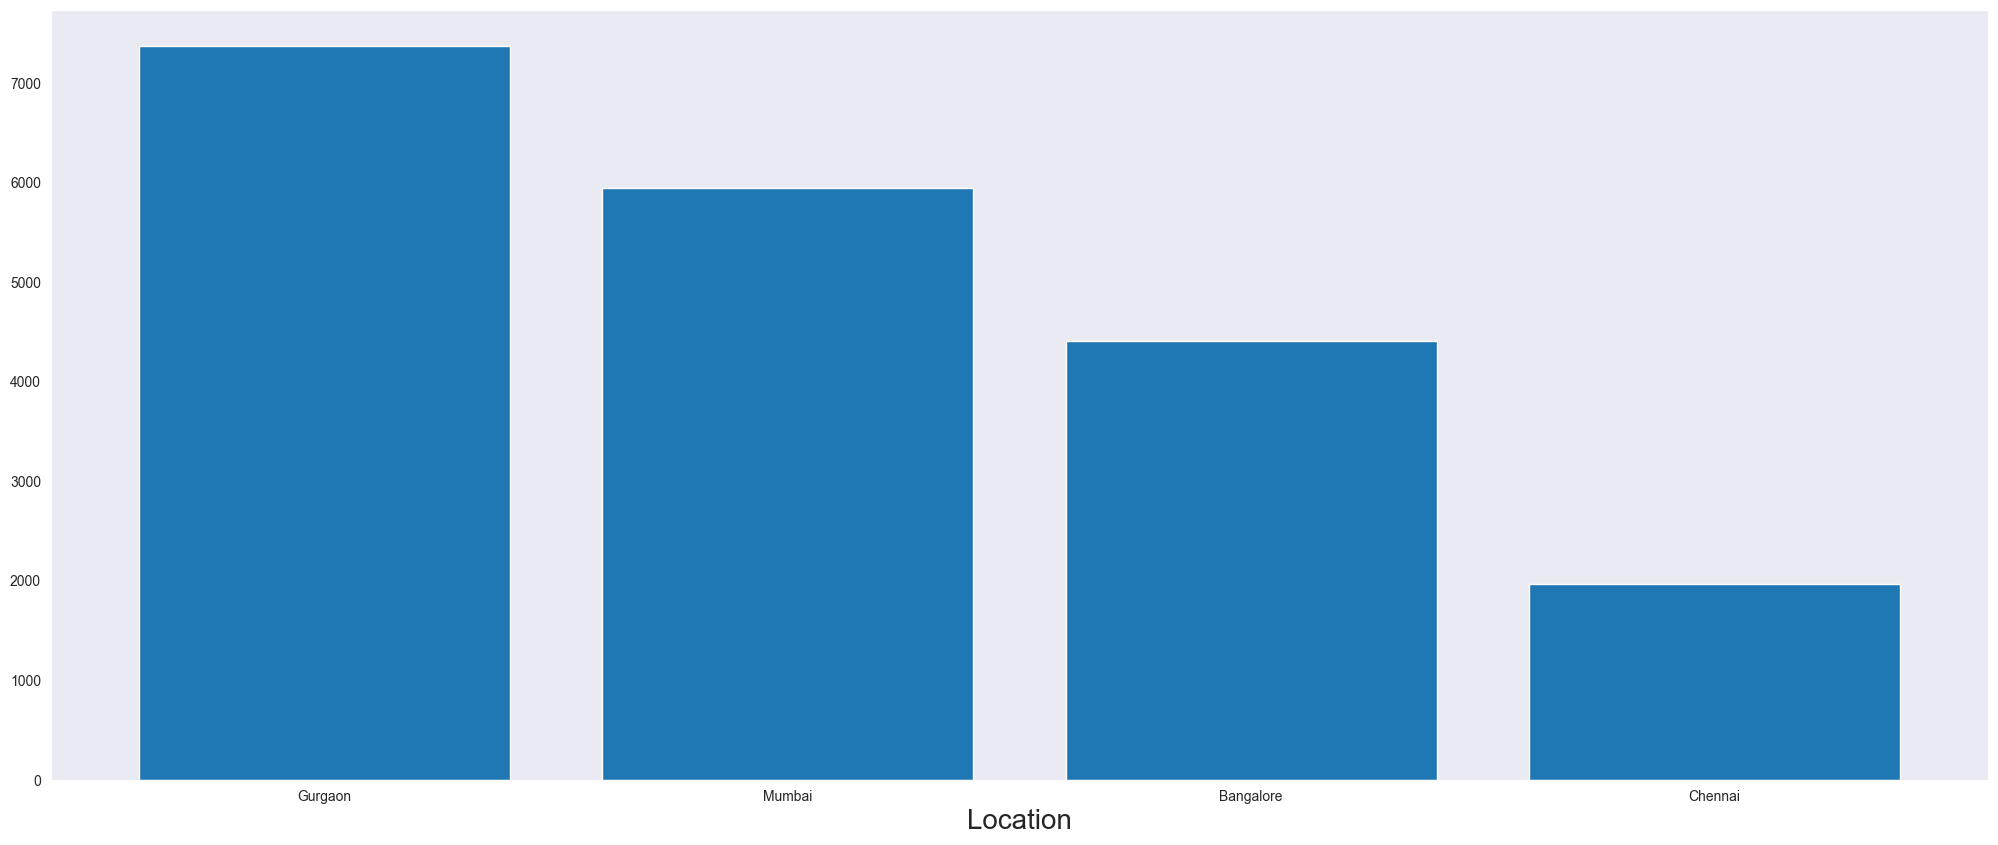

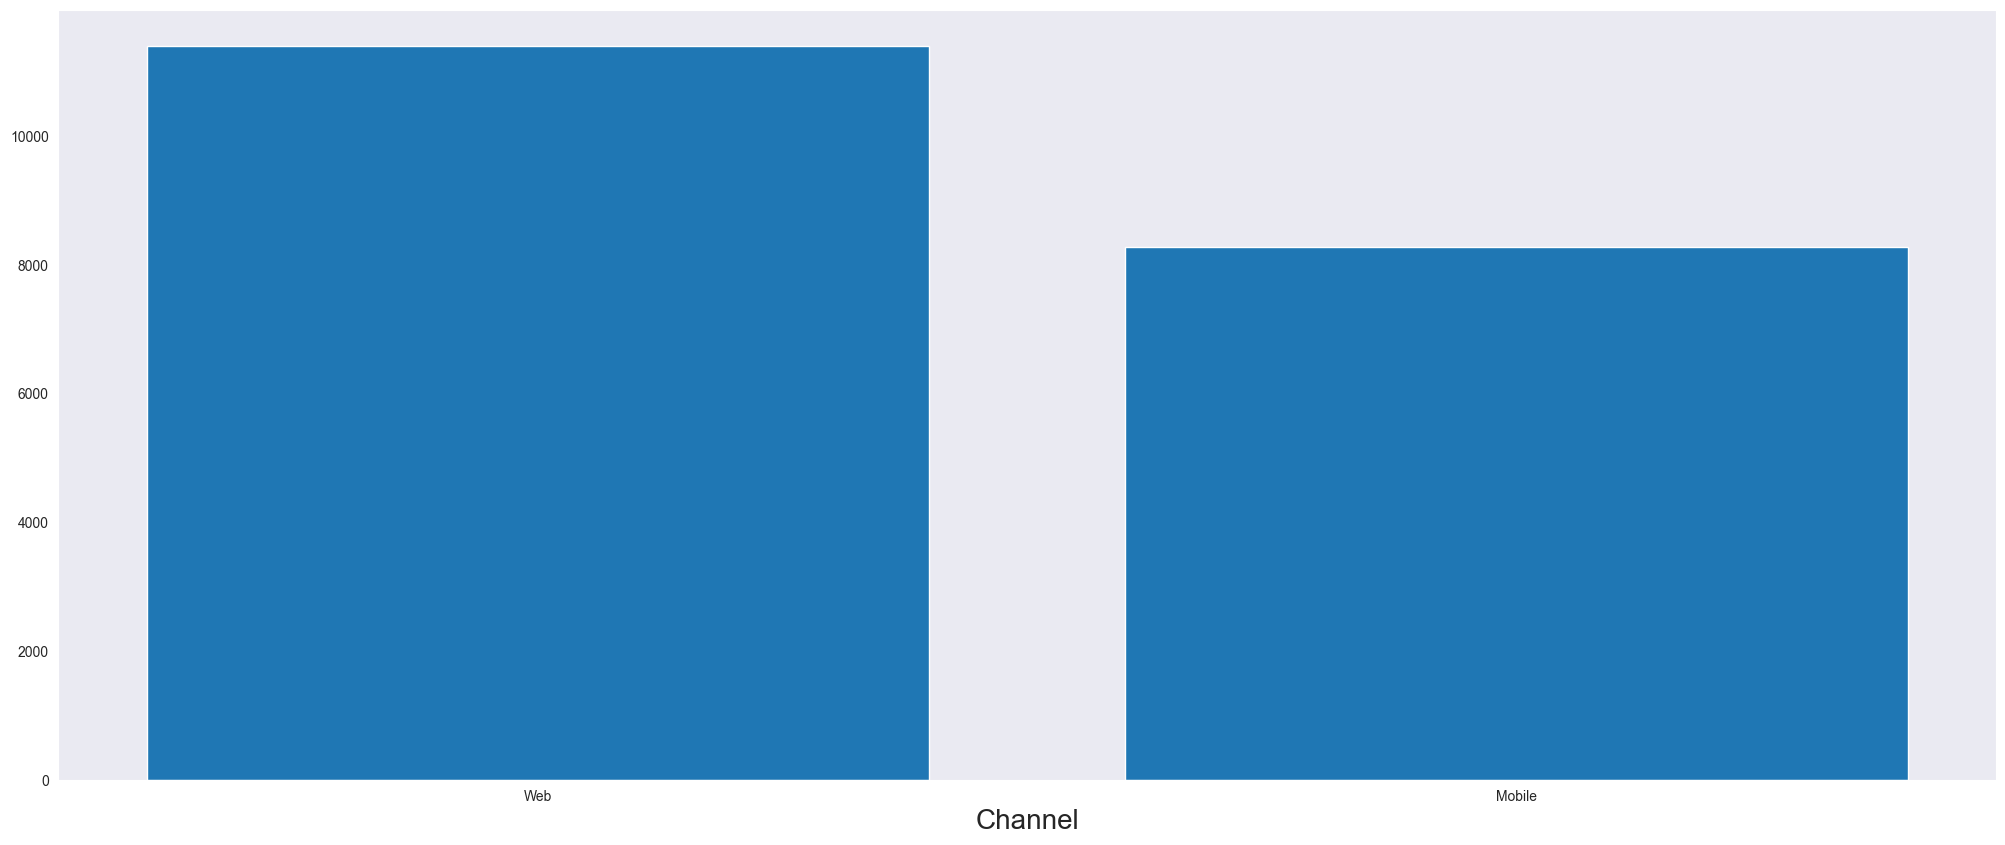

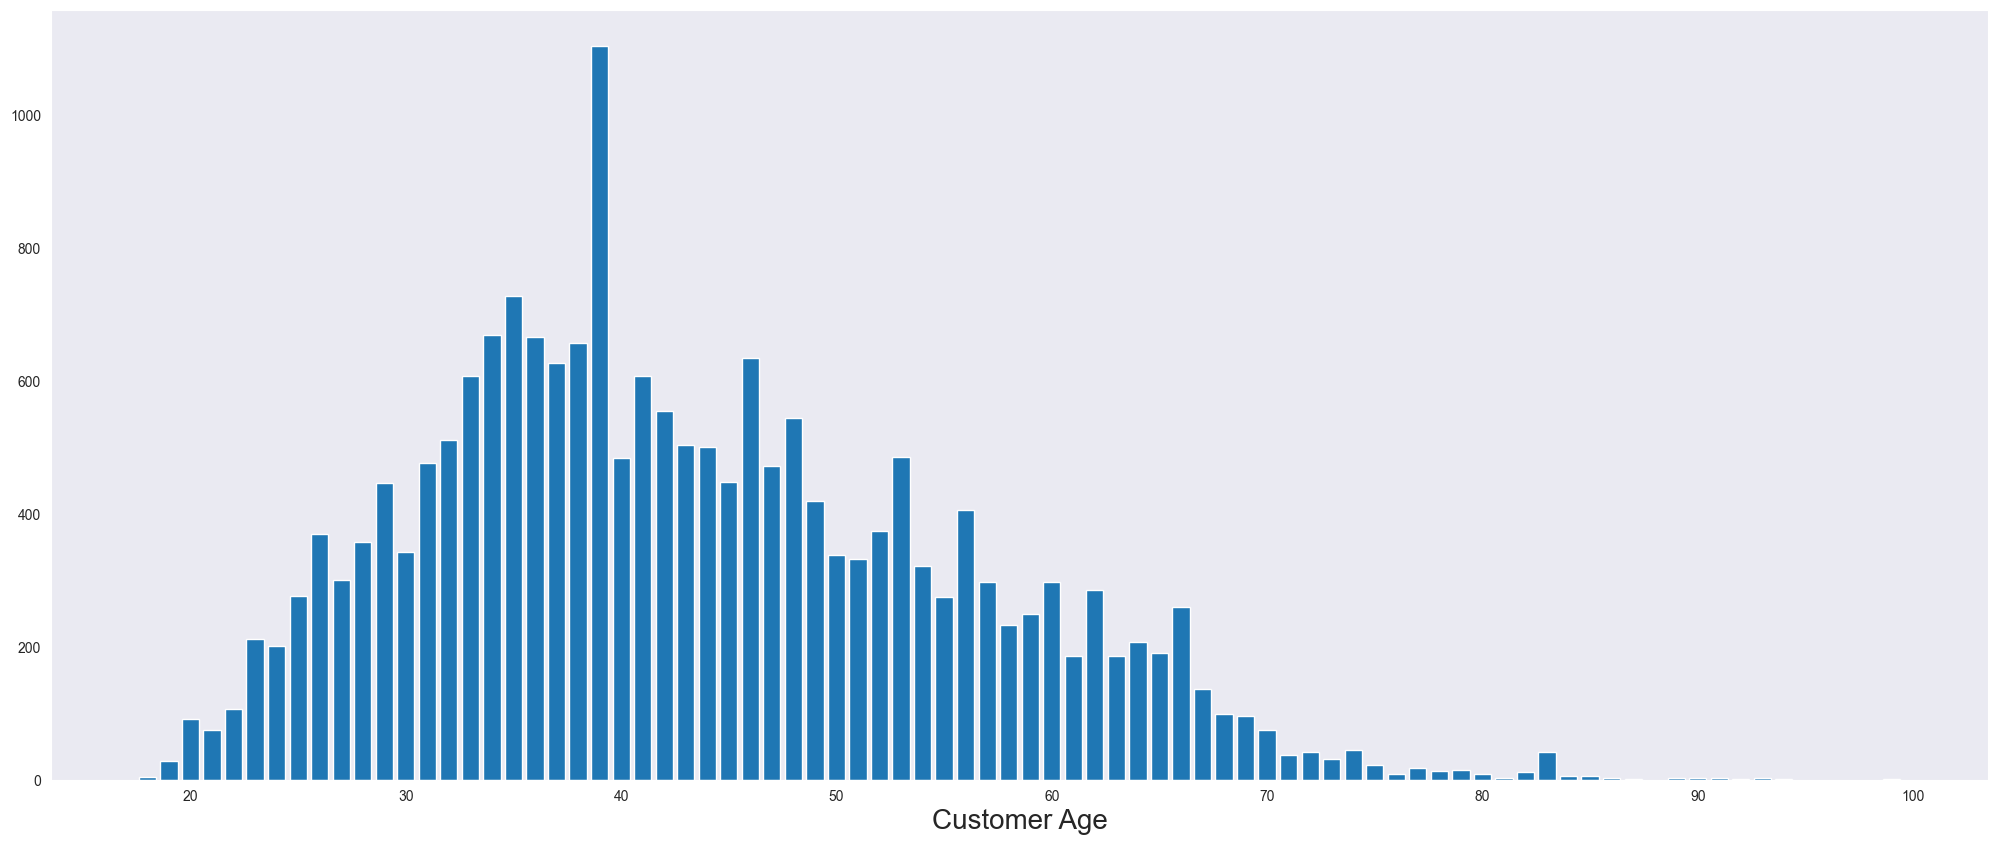

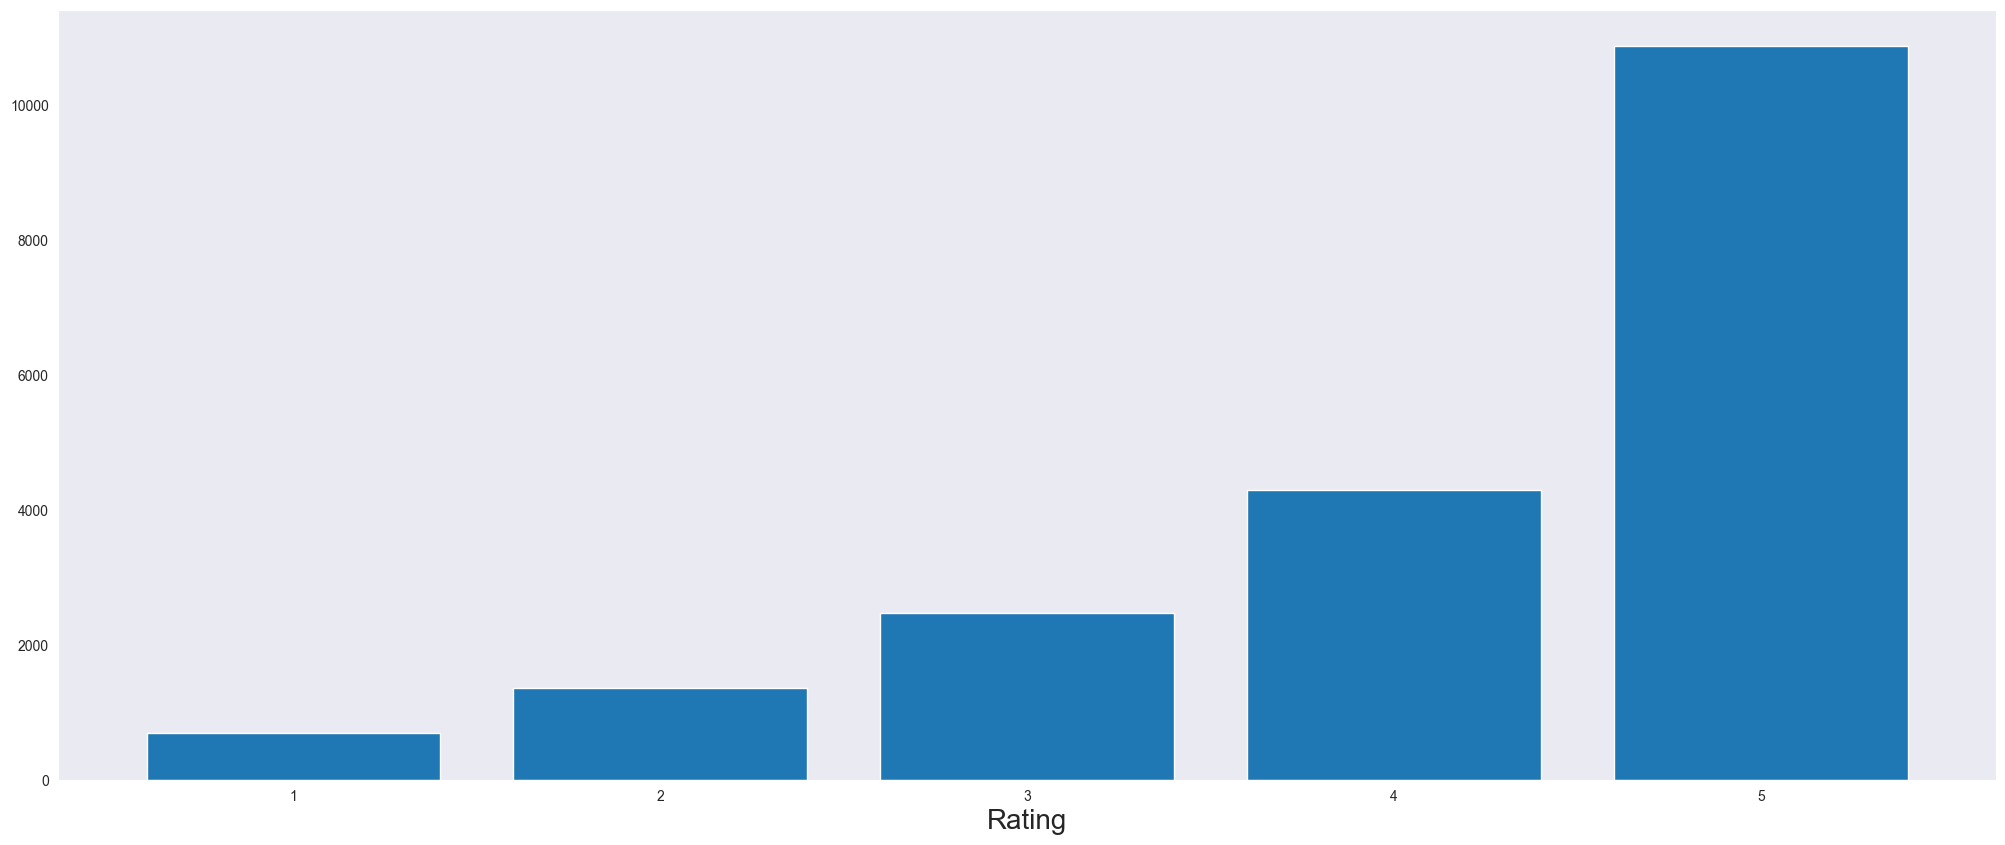

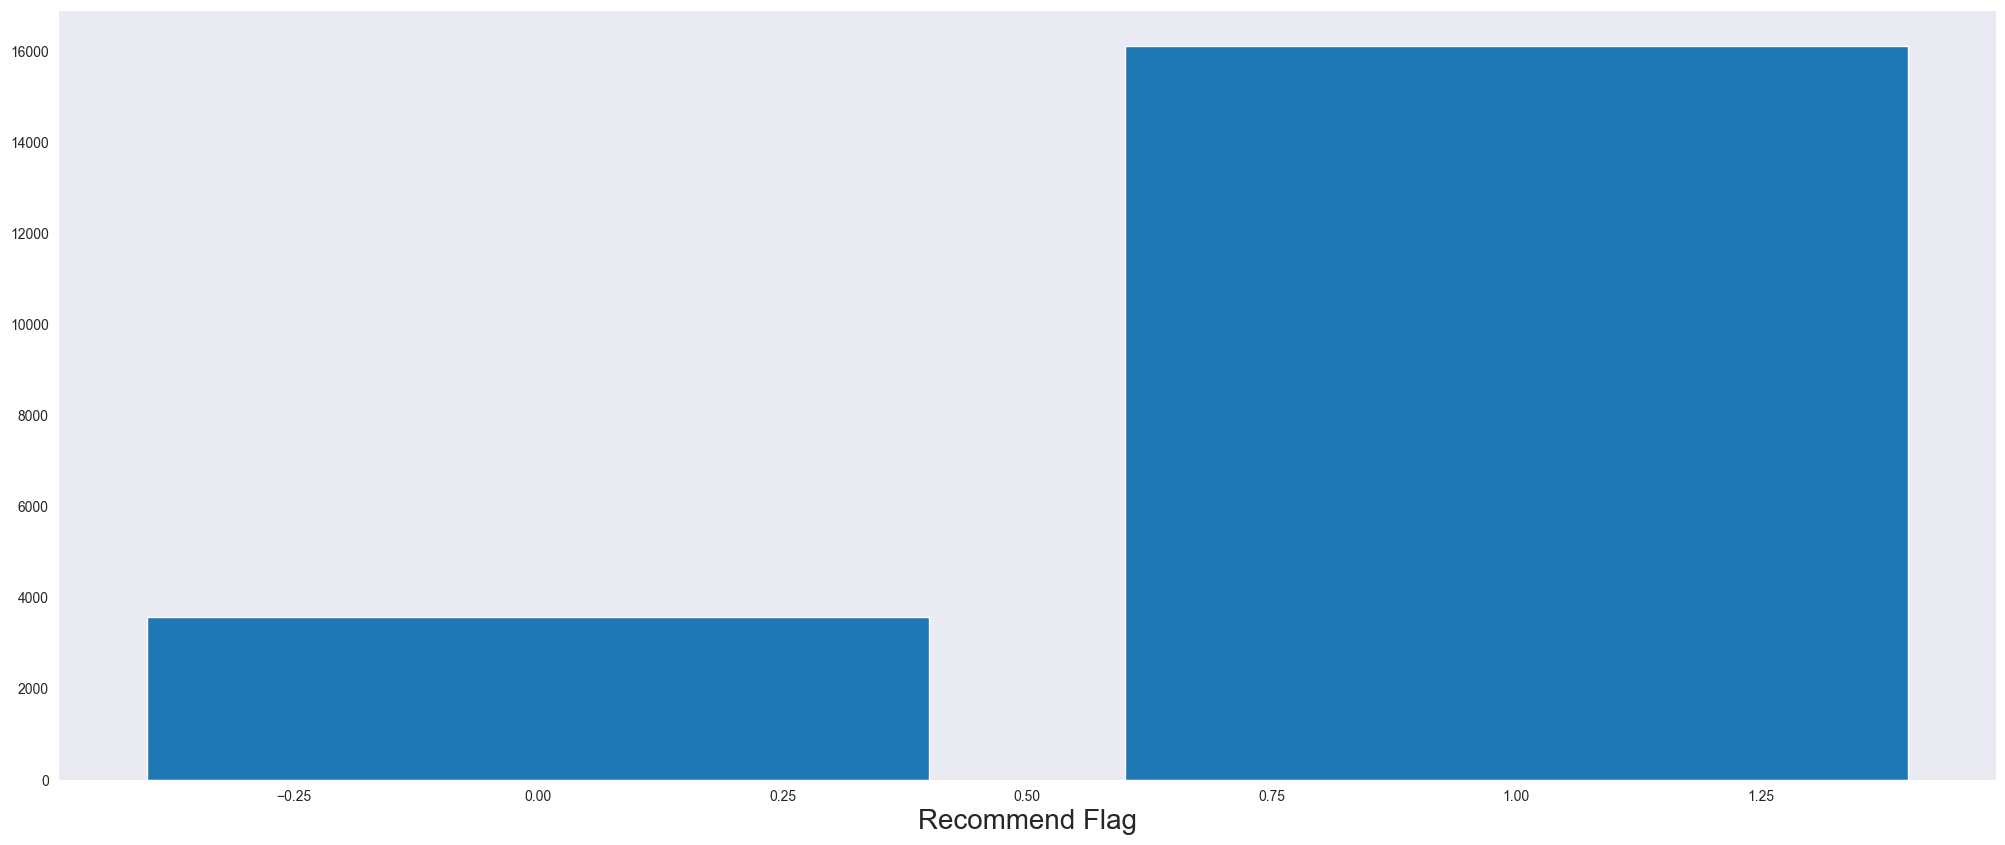

In [17]:
for i in data.columns[~data.columns.isin(['Reviews_whole',"index","Product ID"])]:
    
    plt.figure(figsize=(25,10))
    plt.xlabel(i,fontsize=20)
    plt.bar(data[i].value_counts().index,data[i].value_counts())
    

In [18]:
data.isna().sum()

index              0
Product ID         0
Category          13
Subcategory1      13
SubCategory2      13
Location           0
Channel            0
Customer Age       0
Rating             0
Recommend Flag     0
Reviews_whole      0
dtype: int64

In [19]:
data.groupby("Location").agg({"Rating":"mean"})

,Rating
Location,
Bangalore,4.181529
Chennai,4.182977
Gurgaon,4.174450
Mumbai,4.196970


In [20]:
Data_location_wise=data.groupby(["Location","Rating"]).agg("count")[["index"]]

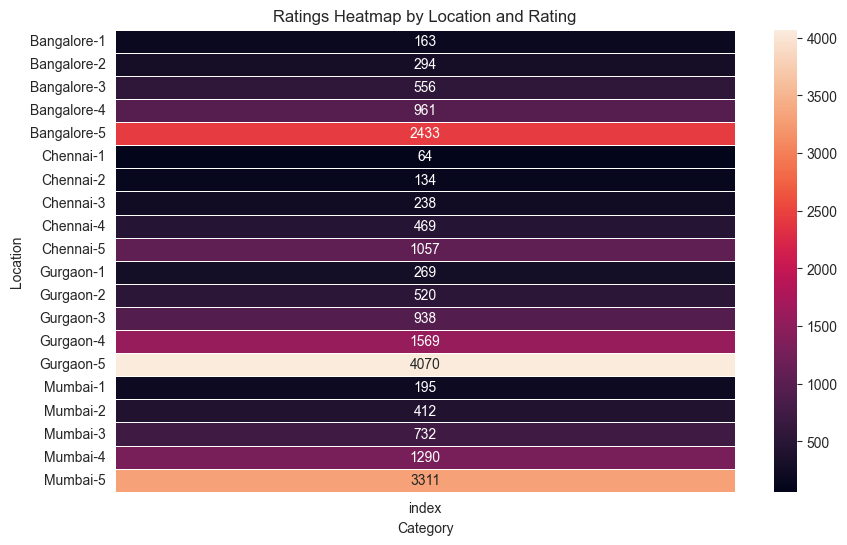

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(Data_location_wise, annot=True, fmt="d", linewidths=.5)
plt.title('Ratings Heatmap by Location and Rating')
plt.xlabel('Category')
plt.ylabel('Location')
plt.show()

<Axes: xlabel='Location'>

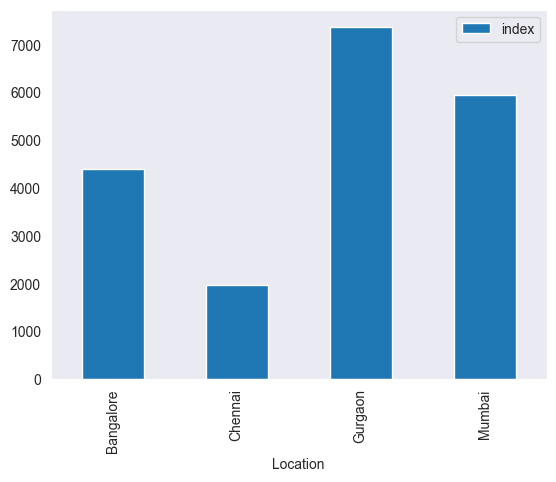

In [22]:
data.groupby("Location").agg("count")[["index"]].plot.bar()

In [23]:
data.groupby(["Category","Rating"]).agg("count")[["index"]]

index
Category       Rating       
General        1         403
               2         831
               3        1530
               4        2552
               5        6348
General Petite 1         244
               2         461
               3         807
               4        1472
               5        3794
Initmates      1          44
               2          68
               3         127
               4         265
               5         716

In [24]:
data.groupby(["Rating"]).agg("mean")[["Customer Age"]]

,Customer Age
Rating,
1,43.399421
2,42.550735
3,42.157468
4,42.932851
5,43.715114


In [25]:
data.isna().sum()

index              0
Product ID         0
Category          13
Subcategory1      13
SubCategory2      13
Location           0
Channel            0
Customer Age       0
Rating             0
Recommend Flag     0
Reviews_whole      0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19675 entries, 0 to 19674
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           19675 non-null  int64 
 1   Product ID      19675 non-null  int64 
 2   Category        19662 non-null  object
 3   Subcategory1    19662 non-null  object
 4   SubCategory2    19662 non-null  object
 5   Location        19675 non-null  object
 6   Channel         19675 non-null  object
 7   Customer Age    19675 non-null  int64 
 8   Rating          19675 non-null  int64 
 9   Recommend Flag  19675 non-null  int64 
 10  Reviews_whole   19675 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.7+ MB


In [27]:
# New column containg the count of number of sentence each row contain
data["Count_sent"]=data["Reviews_whole"].apply(lambda x:len(re.findall("/n",x))+1)

#New column containg the count of number of words on ech sentence in each row contain
data["Count_words"]=data["Reviews_whole"].apply(lambda x:len(x.split()))

#Unique words in a row
data["Unique_words"]=data["Reviews_whole"].apply(lambda x:len(set(x.split())))

#Letter count
data['count_letters']=data["Reviews_whole"].apply(lambda x: len(str(x)))

#Word density
data['word_density'] = data['count_letters'] / (data['Count_words']+1)

#punctuation count
data["count_punctuations"] =data["Reviews_whole"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["Reviews_whole"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
data["count_words_lower"] = data["Reviews_whole"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
data["count_words_title"] = data["Reviews_whole"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["Reviews_whole"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
data["mean_word_len"] = data["Reviews_whole"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
data['numeric'] = data['Reviews_whole'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
data['alphanumeric'] = data['Reviews_whole'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
data['alphabetetics'] = data['Reviews_whole'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of spaces
data['Spaces'] = data['Reviews_whole'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
data['words_ends_with_et'] = data['Reviews_whole'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
data['words_start_with_no'] = data['Reviews_whole'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
data['wordcounts'] = data['Reviews_whole'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

In [28]:
data

,index,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Rating,Recommend Flag,...,count_words_title,count_stopwords,mean_word_len,numeric,alphanumeric,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts
0,2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,...,1,46,4.188119,0,88,88,0,1,1,"{'a': 2, 'size)': 1, 'zip': 1, 'layers.': 1, '..."
1,3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,...,1,7,4.875000,0,14,14,0,1,1,"{'fabulous!': 1, 'fun,': 1, 'favorite': 1, 'th..."
2,4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,...,1,19,4.648649,0,34,34,0,0,0,"{'front': 1, 'shirtThis': 1, 'length': 1, 'car..."
3,5,1080,General,Dresses,Dresses,Gurgaon,Web,49,2,0,...,1,59,4.019608,1,93,91,0,1,4,"{'a': 3, 'take': 1, 'package': 1, 'usually': 1..."
4,6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,5,1,...,1,47,4.019417,1,86,85,0,2,1,"{'a': 1, ':-)': 1, 'petite).': 1, '(store': 1,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,5,1,...,1,17,4.062500,0,29,29,0,0,0,"{'a': 2, 'happy': 1, 'flattering': 1, 'this': ..."
19671,23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,3,1,...,1,16,4.813953,0,33,33,0,0,1,"{'button': 1, 'awkward.': 1, 'found': 1, 'clos..."
19672,23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,3,0,...,1,22,4.111111,0,36,36,0,0,0,"{'well,': 1, 'never': 1, 'this': 1, 'online.':..."
19673,23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,3,1,...,1,49,4.085106,0,81,81,0,1,3,"{'money,': 1, 'a': 2, 'note': 1, 'wedding': 1,..."


In [29]:
data

,index,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Rating,Recommend Flag,...,count_words_title,count_stopwords,mean_word_len,numeric,alphanumeric,alphabetetics,Spaces,words_ends_with_et,words_start_with_no,wordcounts
0,2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,3,0,...,1,46,4.188119,0,88,88,0,1,1,"{'a': 2, 'size)': 1, 'zip': 1, 'layers.': 1, '..."
1,3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,5,1,...,1,7,4.875000,0,14,14,0,1,1,"{'fabulous!': 1, 'fun,': 1, 'favorite': 1, 'th..."
2,4,847,General,Tops,Blouses,Bangalore,Web,47,5,1,...,1,19,4.648649,0,34,34,0,0,0,"{'front': 1, 'shirtThis': 1, 'length': 1, 'car..."
3,5,1080,General,Dresses,Dresses,Gurgaon,Web,49,2,0,...,1,59,4.019608,1,93,91,0,1,4,"{'a': 3, 'take': 1, 'package': 1, 'usually': 1..."
4,6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,5,1,...,1,47,4.019417,1,86,85,0,2,1,"{'a': 1, ':-)': 1, 'petite).': 1, '(store': 1,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,5,1,...,1,17,4.062500,0,29,29,0,0,0,"{'a': 2, 'happy': 1, 'flattering': 1, 'this': ..."
19671,23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,3,1,...,1,16,4.813953,0,33,33,0,0,1,"{'button': 1, 'awkward.': 1, 'found': 1, 'clos..."
19672,23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,3,0,...,1,22,4.111111,0,36,36,0,0,0,"{'well,': 1, 'never': 1, 'this': 1, 'online.':..."
19673,23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,3,1,...,1,49,4.085106,0,81,81,0,1,3,"{'money,': 1, 'a': 2, 'note': 1, 'wedding': 1,..."


## Calculating Sentiment analysis using Textblob module

In [30]:
data['sentiment_value'] = data["Reviews_whole"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [31]:
data['sentiment_P&N'] = np.where(data.sentiment_value>0.1,'Positive', 'Negative')

In [32]:
# sentiment among customer based by location
pd.crosstab(data["sentiment_P&N"],data["Location"])

Location,Bangalore,Chennai,Gurgaon,Mumbai
sentiment_P&N,,,,
Negative,698,327,1190,895
Positive,3709,1635,6176,5045


In [33]:
# sentiment among customer based by Rating
pd.crosstab(data["sentiment_P&N"],data["Rating"])

Rating,1,2,3,4,5
sentiment_P&N,,,,,
Negative,375,603,746,645,741
Positive,316,757,1718,3644,10130


In [34]:
# sentiment among customer based by category
pd.crosstab(data["sentiment_P&N"],data["Category"])

Category,General,General Petite,Initmates
sentiment_P&N,,,
Negative,1847,1049,214
Positive,9817,5729,1006


In [35]:
# sentiment among customer based by subcategory1
pd.crosstab(data["sentiment_P&N"],data["Subcategory1"])

Subcategory1,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
sentiment_P&N,,,,,,
Negative,499,866,254,150,1320,21
Positive,2685,4505,1154,729,7393,86


In [36]:
# sentiment among customer based by channel
pd.crosstab(data["sentiment_P&N"],data["Channel"])

Channel,Mobile,Web
sentiment_P&N,,
Negative,1284,1826
Positive,6994,9571


In [37]:
import contractions
stop = set(nltk.corpus.stopwords.words('english'))
def Text_clean(df):
    text=df.lower()
    text=df.strip()
    text = contractions.fix(text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

## Positive reviews Word cloud

In [38]:
Positive_review= data[((data["sentiment_P&N"] == 'Positive') & (data.Rating >=4))].loc[:,'Reviews_whole']

In [39]:
Positive_review

1        My favorite buy!I love, love, love this jumpsu...
2        Flattering shirtThis shirt is very flattering ...
4        Cagrcoal shimmer funI aded this in my basket a...
5        Shimmer, surprisingly goes with lotsI ordered ...
7        Such a fun dress!I'm 5"5' and 125 lbs. i order...
                               ...                        
19666    Cheeky!These bottoms are very cute but defiant...
19667    EntrancingI'm so impressed with the beautiful ...
19669    What a fun piece!So i wasn't sure about orderi...
19670    Great dress for many occasionsI was very happy...
19674    Please make more like this one!This dress in a...
Name: Reviews_whole, Length: 13774, dtype: object

In [40]:
Positive_review = Positive_review.apply(lambda x: Text_clean(x))
Positive_review 

1        My favorite buyI love love love this jumpsuit ...
2        Flattering shirtThis shirt is very flattering ...
4        Cagrcoal shimmer funI aded this in my basket a...
5        Shimmer surprisingly goes with lotsI ordered t...
7        Such a fun dressI am  and  lbs i ordered the s...
                               ...                        
19666    CheekyThese bottoms are very cute but defiantl...
19667    EntrancingIm so impressed with the beautiful c...
19669    What a fun pieceSo i was not sure about orderi...
19670    Great dress for many occasionsI was very happy...
19674    Please make more like this oneThis dress in a ...
Name: Reviews_whole, Length: 13774, dtype: object

In [41]:
Positive_review=Positive_review.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Positive_review=Positive_review.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [42]:
Positive_review

1        My favorite buyI love love love jumpsuit fun f...
2        Flattering shirtThis shirt flattering due adju...
4        Cagrcoal shimmer funI aded basket hte last min...
5        Shimmer surprisingly go lotsI ordered carbon s...
7        Such fun dressI lb ordered petite make sure le...
                               ...                        
19666    CheekyThese bottom cute defiantly cheeky would...
19667    EntrancingIm impressed beautiful color combina...
19669    What fun pieceSo wa sure ordering skirt could ...
19670    Great dress many occasionsI wa happy snag dres...
19674    Please make like oneThis dress lovely platinum...
Name: Reviews_whole, Length: 13774, dtype: object

### Generate wordcloud based on words

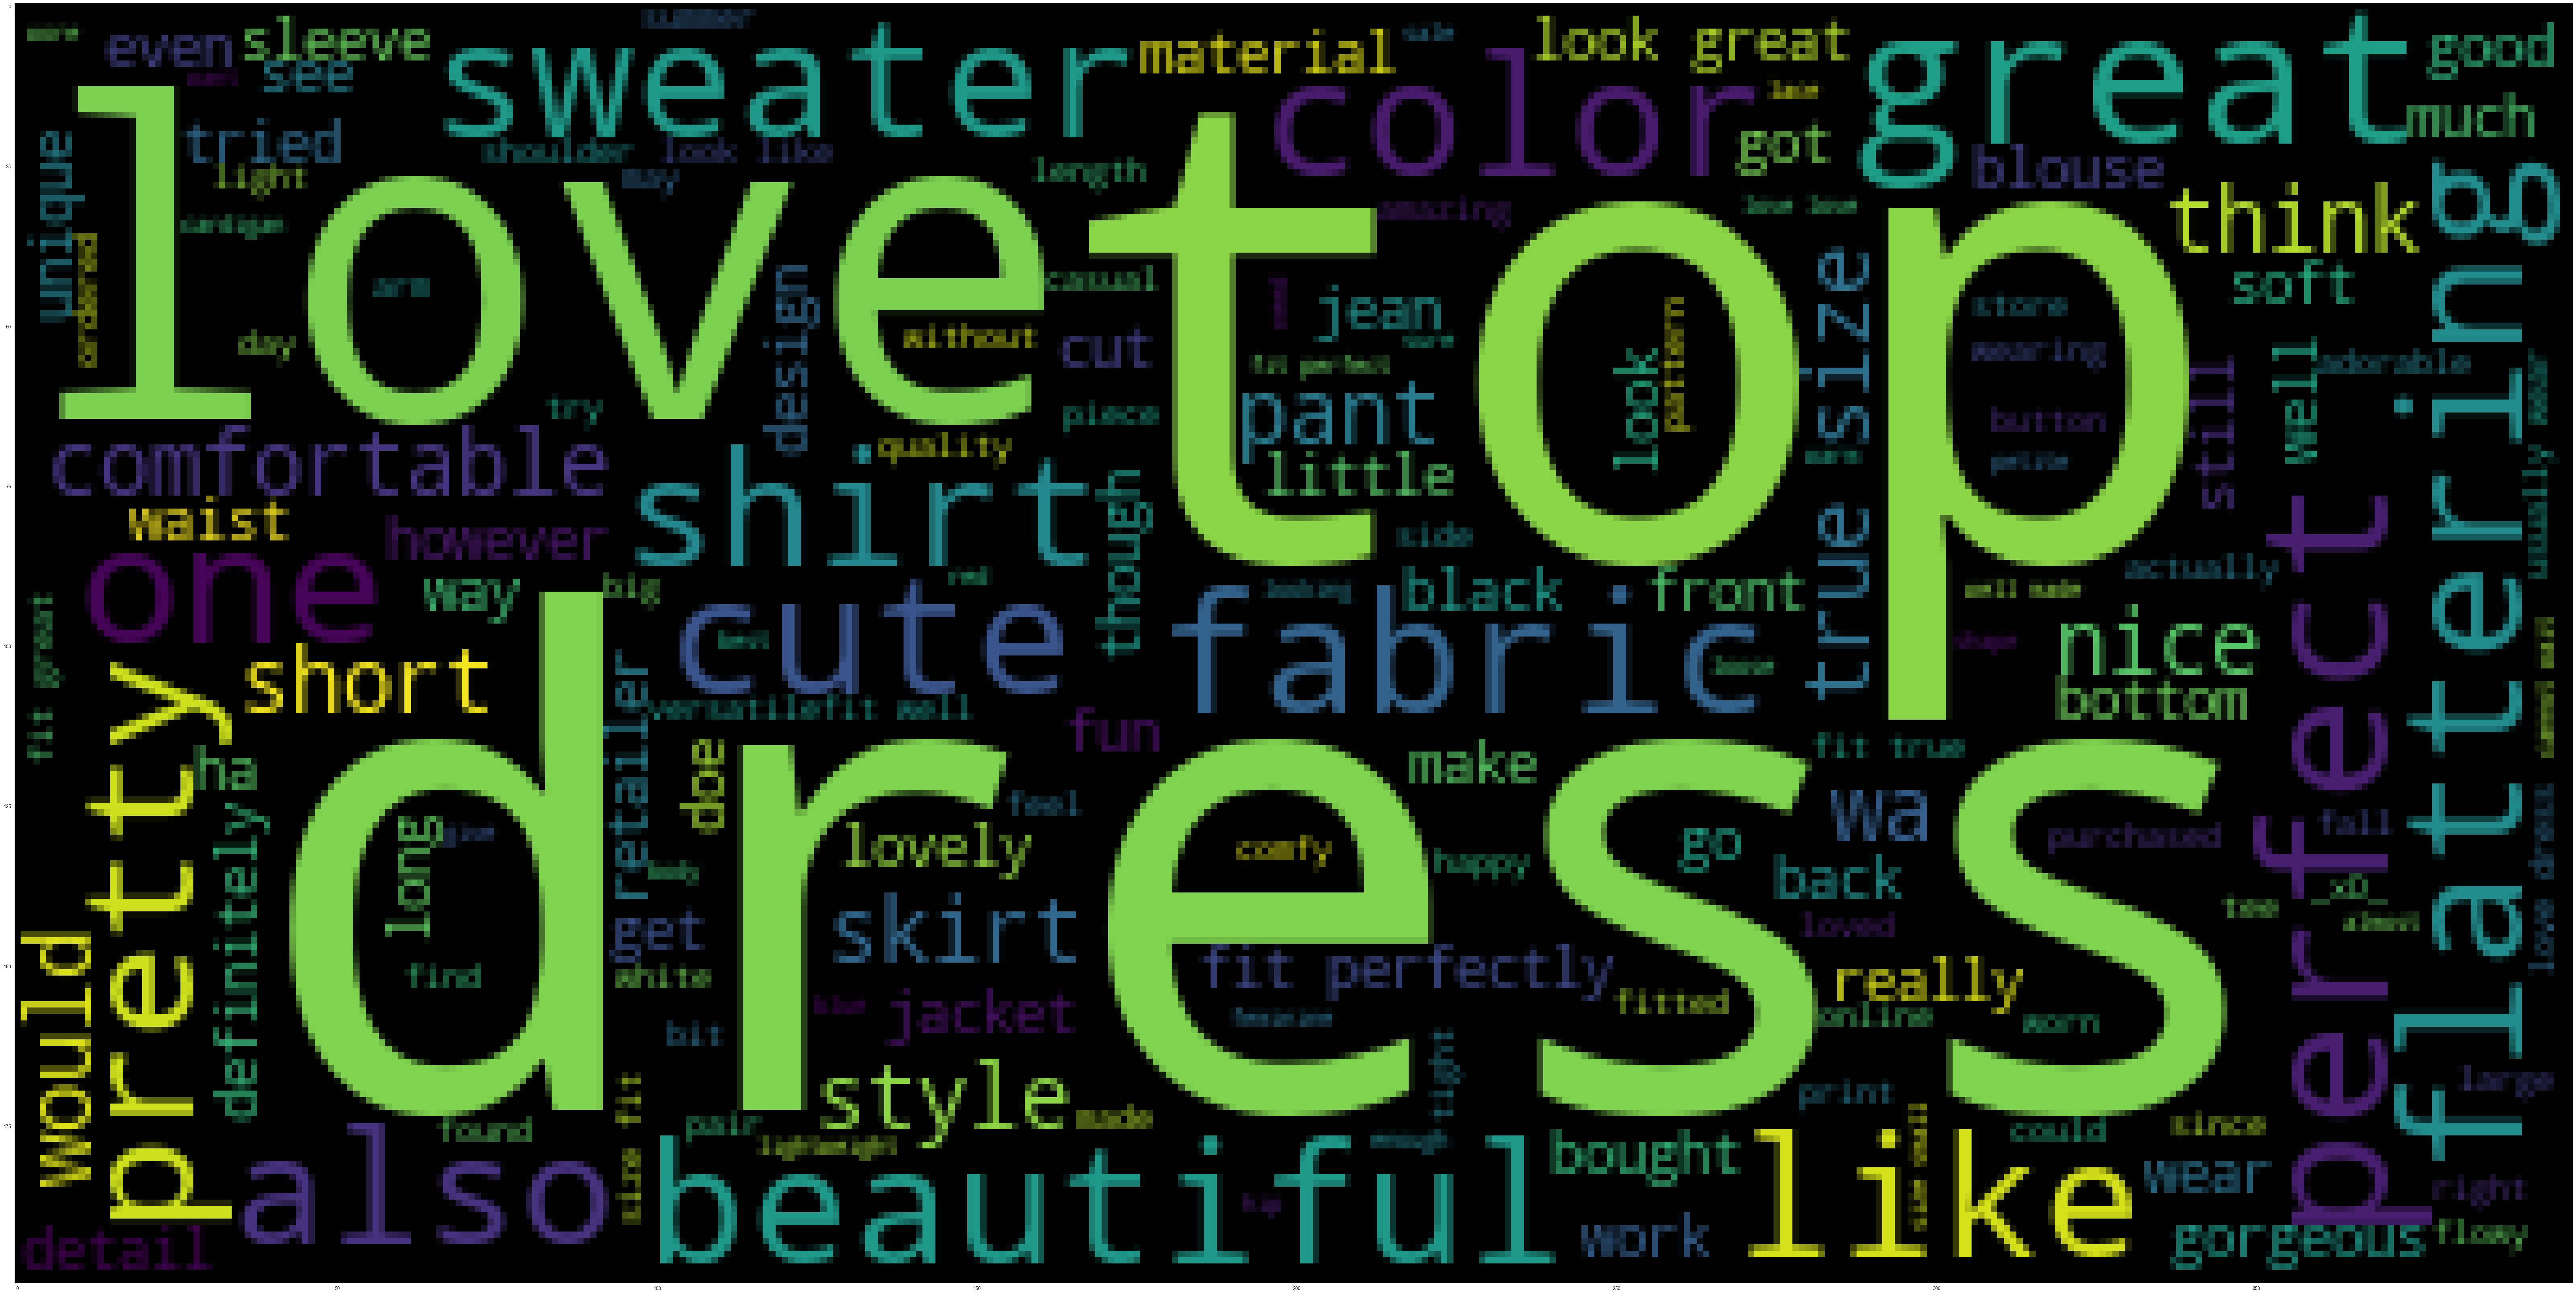

In [43]:

wordcloud = WordCloud(stopwords=stop).generate(' '.join(Positive_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(150,50))
plt.imshow(wordcloud)
plt.show()

In [44]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names_out())

In [45]:
Positive_review_dtm

,_xd_,a,able,absolutely,across,actually,add,added,addition,adorable,...,x,xl,xx,year,yellow,yes,yesterday,yet,zip,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


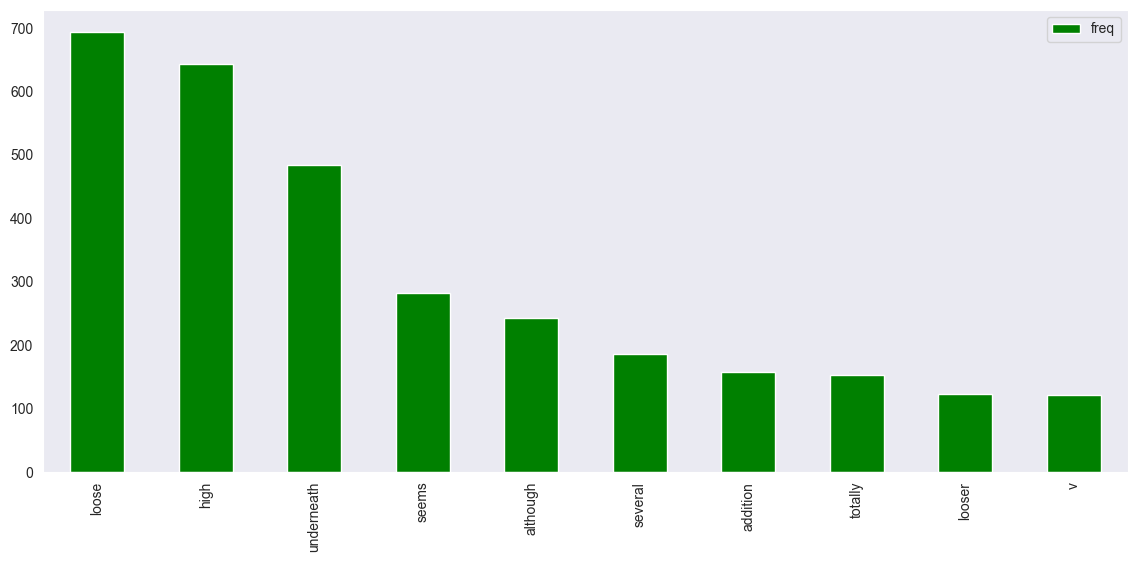

In [46]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum).sample(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Green',figsize=(14,6))
plt.show()

### Generating word clouds using word frequencies 

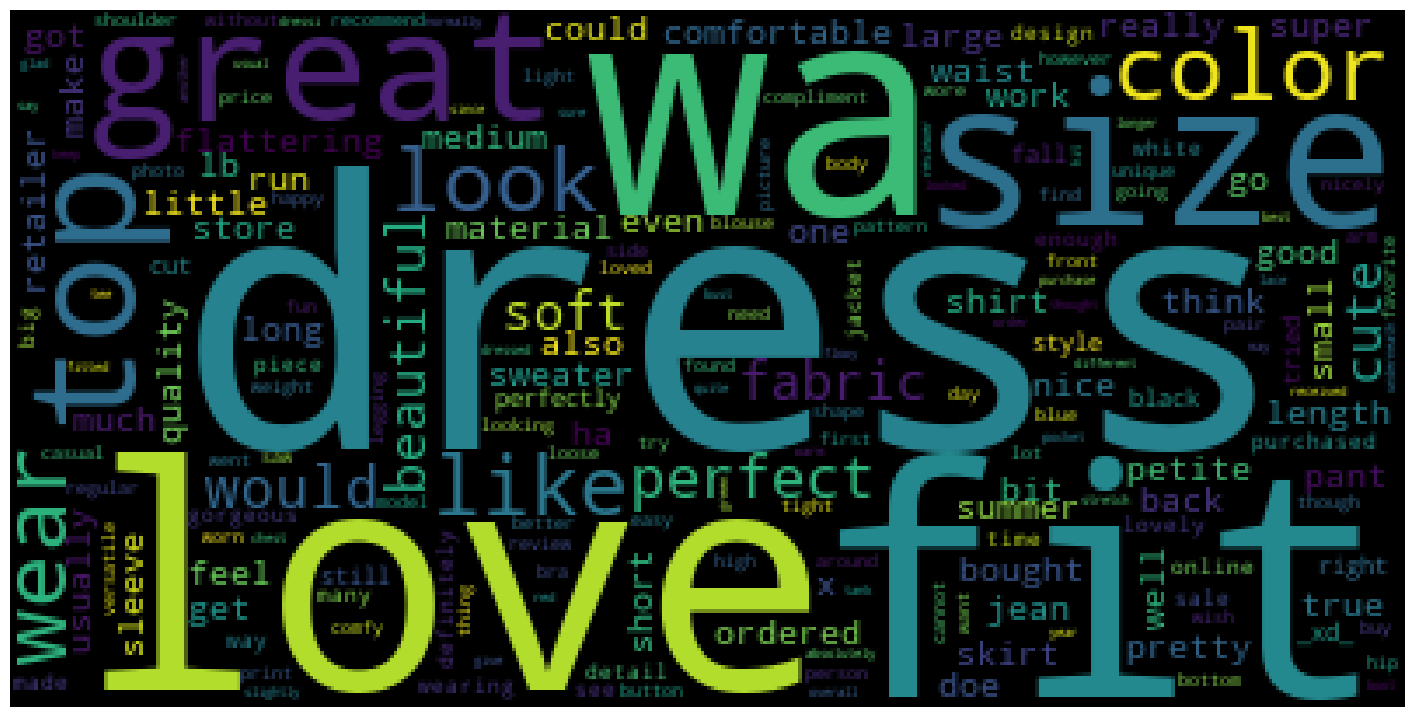

In [47]:
word_freq_dictionary = dict(Positive_review_dtm.apply(sum))

from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(18, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Negative reviews word cloud

In [48]:
Negative_review= data[((data["sentiment_P&N"]== 'Negative') & (data.Rating <=3))].loc[:,'Reviews_whole']

In [49]:
Negative_review = Negative_review.apply(lambda x: Text_clean(x))
Negative_review=Negative_review.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Negative_review=Negative_review.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [50]:
Negative_review

0        Some major design flawsI high hope dress reall...
8        Dress look like made cheap materialDress run s...
11       Pretty party dress issuesThis nice choice holi...
13       You need least average height tallerMaterial c...
19       Not look likeFirst pullover styling side zippe...
                               ...                        
19620    Extremely sheerBefore ordered noted review sai...
19643    Not meI tried color really pretty fun donset w...
19651    Such high hopesI purchased good price typicall...
19668    UnflatteringI wa surprised positive review pro...
19671    Wish wa made cottonIt reminds maternity clothe...
Name: Reviews_whole, Length: 1724, dtype: object

### Generate wordcloud based on words

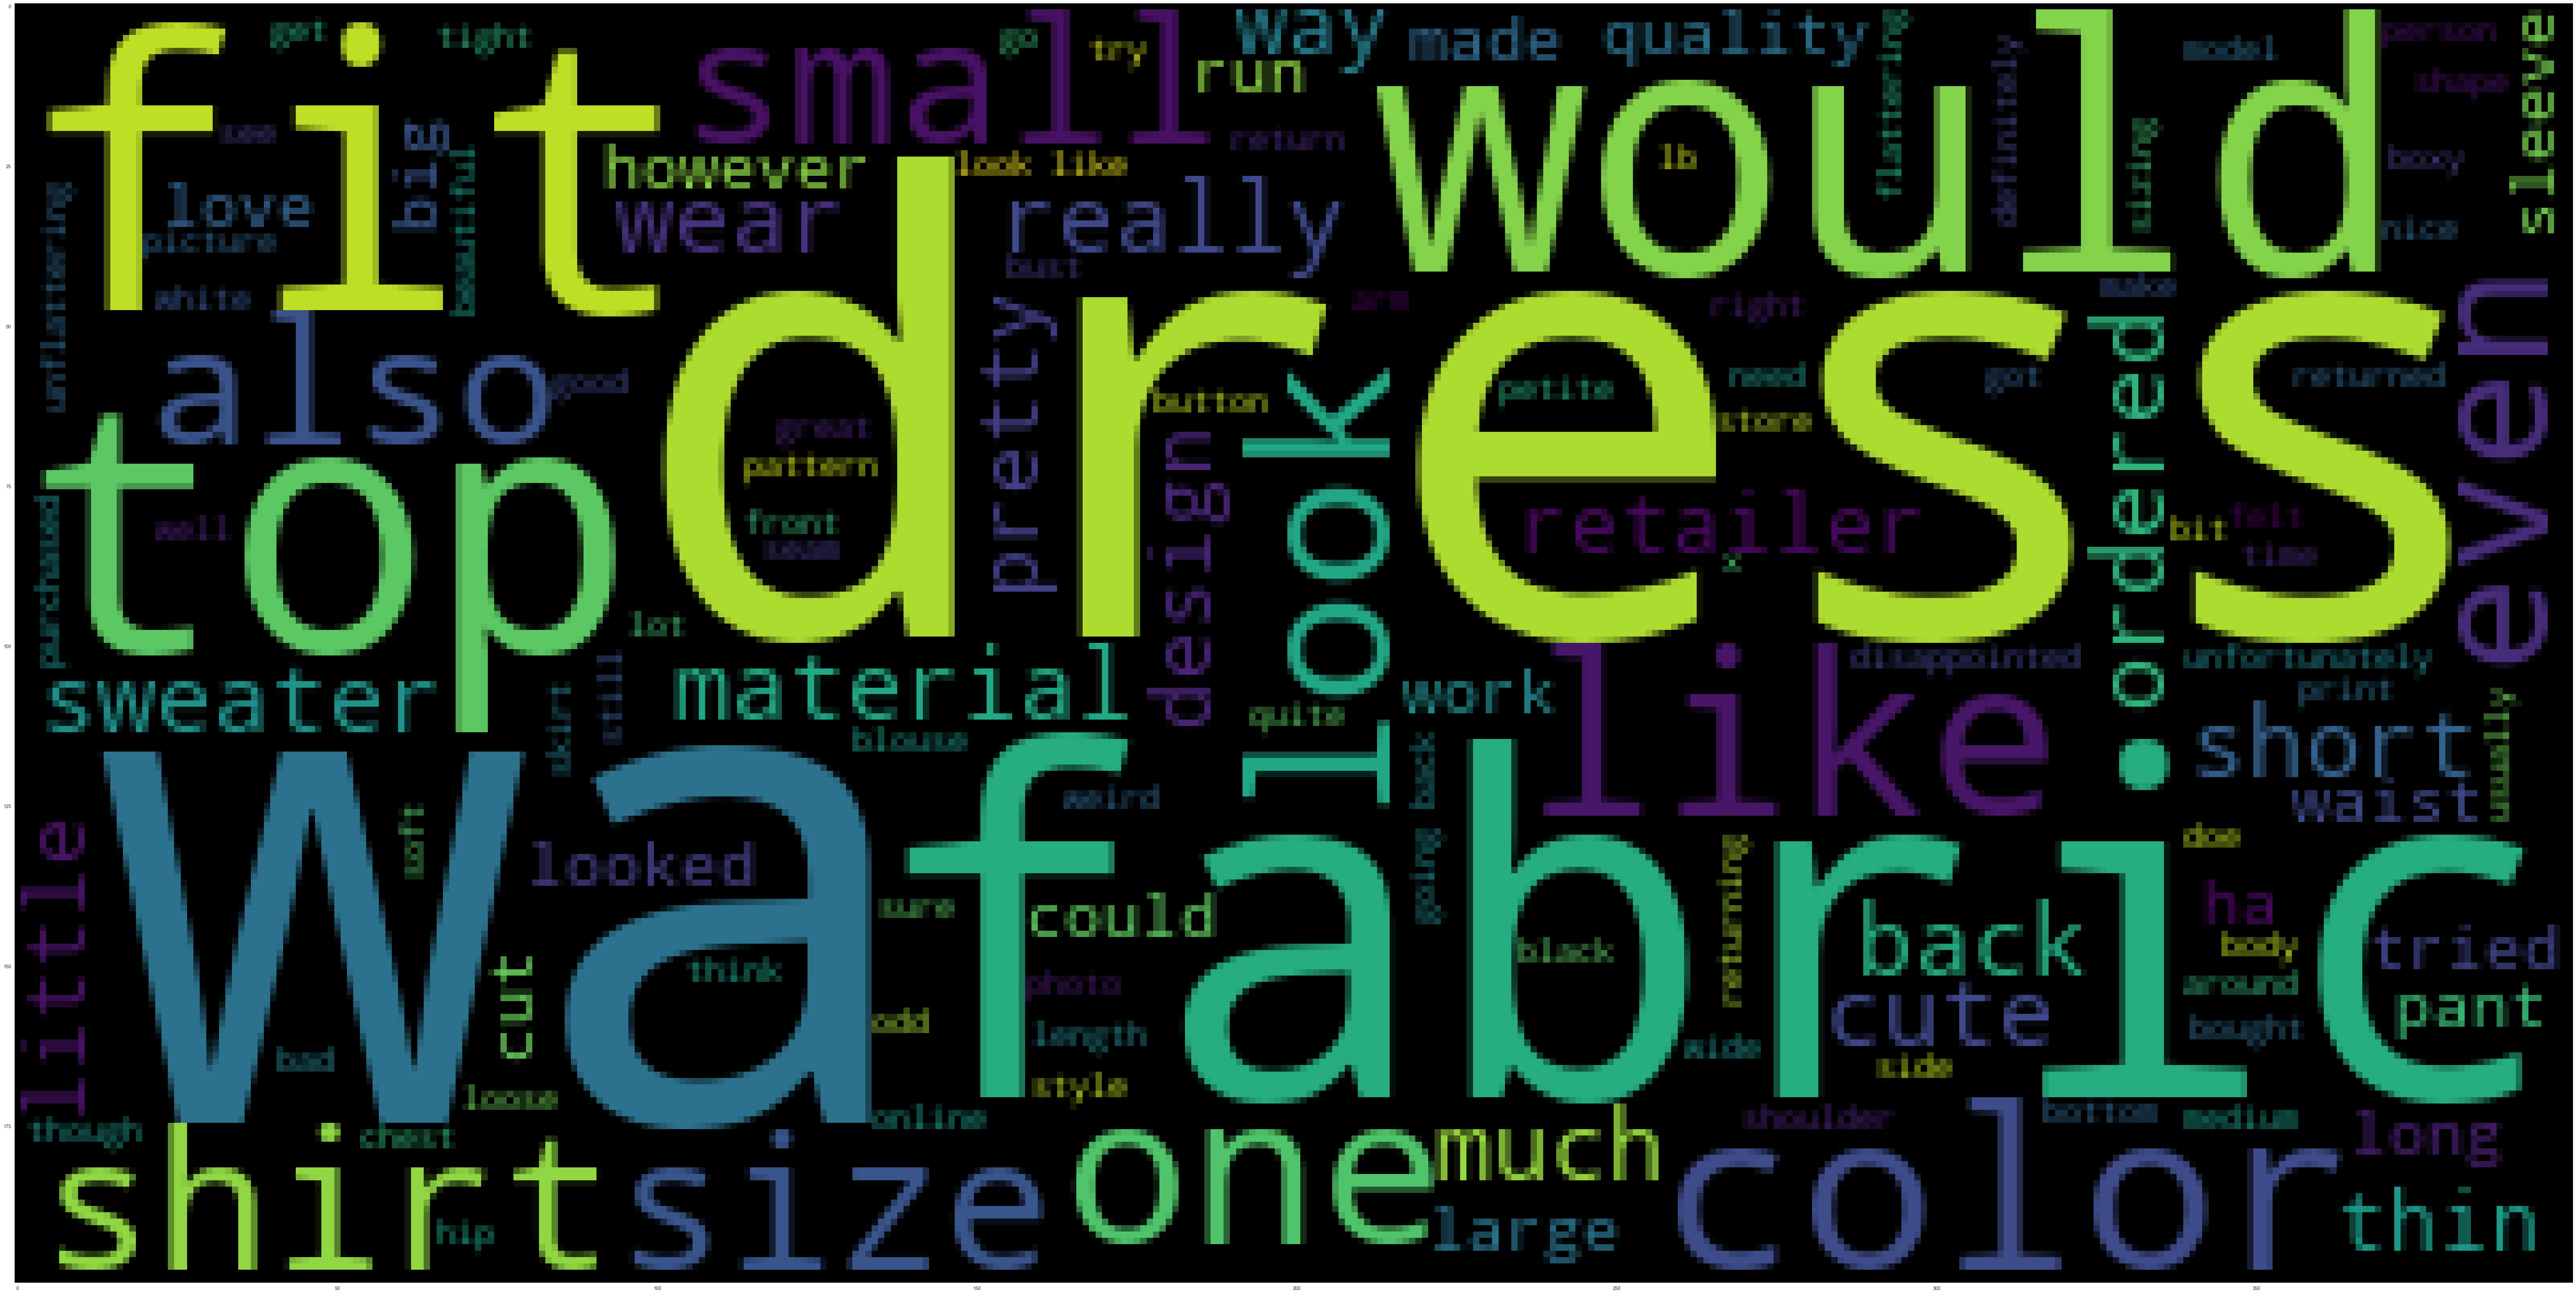

In [51]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Negative_review.tolist()))

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)
plt.show()

In [52]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names_out())

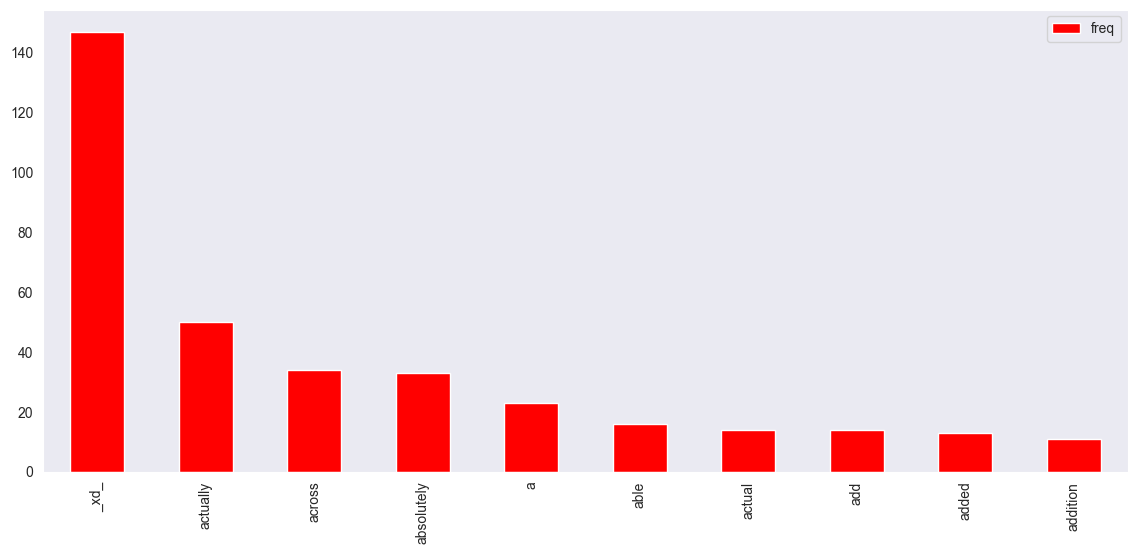

In [53]:
word_freq = pd.DataFrame(Negative_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='red',figsize=(14,6))
plt.show()

### Generating word clouds using word frequencies

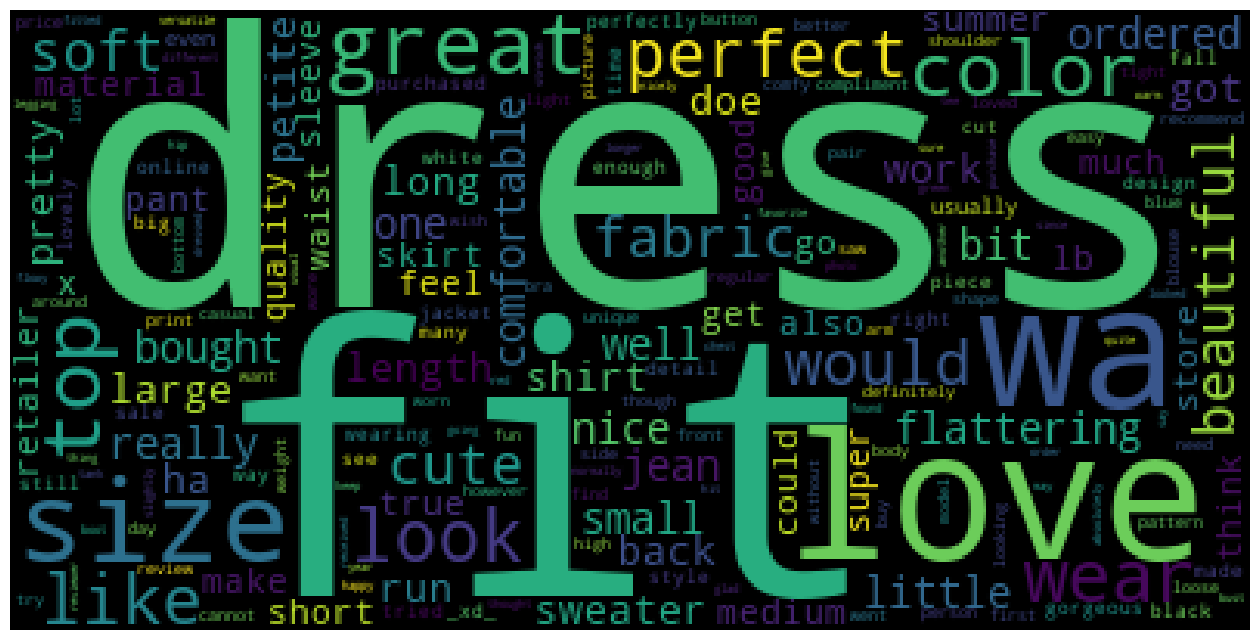

In [54]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(16, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Split the data into train & Test

In [55]:
# define X and y
X = data.Reviews_whole
Y = data["Recommend Flag"]

# split the new DataFrame into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [56]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [57]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

##  Models Building

In [58]:
#Importing packages
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

In [59]:
#Model building
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(4,50)}
data_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3,n_jobs=-1, verbose=True)
data_tree.fit(dtm_tfidf_train,train_y)

Fitting 3 folds for each of 276 candidates, totalling 828 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             verbose=True)

In [60]:
print('Best parameters : ',data_tree.best_params_)
print('Accuracy : ' ,data_tree.best_score_)

Best parameters :  {'max_depth': 7, 'max_features': 47}
Accuracy :  0.8287837480644379


In [61]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_tree.predict(dtm_tfidf_train)))

              precision    recall  f1-score   support

           0       0.72      0.23      0.34      2529
           1       0.85      0.98      0.91     11243

    accuracy                           0.84     13772
   macro avg       0.78      0.60      0.63     13772
weighted avg       0.83      0.84      0.81     13772



In [62]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,data_tree.predict(X_test_tfidf)))

              precision    recall  f1-score   support

           0       0.62      0.18      0.28      1046
           1       0.85      0.98      0.91      4857

    accuracy                           0.84      5903
   macro avg       0.74      0.58      0.60      5903
weighted avg       0.81      0.84      0.80      5903



#### Decision Tree model is giving 83 % Accuracy on Train & Test data.

### RandomForestClassifier

In [63]:
#Importing Required package
from  sklearn.ensemble import RandomForestClassifier

In [64]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4,5,6,7,8]}

data_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1 , verbose=1)
data_rf.fit(dtm_tfidf_train,train_y)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 60, 70, 80, 100]},
             verbose=1)

In [65]:
print('Best parameters : ',data_rf.best_params_)
print('Accuracy : ' ,data_rf.best_score_)

Best parameters :  {'max_depth': 8, 'n_estimators': 70}
Accuracy :  0.8179639144314276


In [66]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_rf.predict(dtm_tfidf_train)))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02      2529
           1       0.82      1.00      0.90     11243

    accuracy                           0.82     13772
   macro avg       0.91      0.51      0.46     13772
weighted avg       0.85      0.82      0.74     13772



#### RandomForestClassifier model is giving 82 % Accuracy on Train data.

### xgboost

In [67]:
#Importing Required packages
import xgboost

In [71]:
pargrid_xg = {'n_estimators': [70,80,90,100],
               'max_depth':[5,7,9,11,13]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBClassifier(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1, verbose=1)

data_xg=gscv_xg.fit(dtm_tfidf_train, train_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [72]:
print('Best parameters : ',data_xg.best_params_)
print('Accuracy : ' ,data_xg.best_score_)

Best parameters :  {'max_depth': 11, 'n_estimators': 100}
Accuracy :  0.8831688313167422


In [73]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_xg.predict(dtm_tfidf_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2529
           1       1.00      1.00      1.00     11243

    accuracy                           1.00     13772
   macro avg       1.00      1.00      1.00     13772
weighted avg       1.00      1.00      1.00     13772



In [74]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,data_xg.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64      1046
           1       0.91      0.97      0.94      4857

    accuracy                           0.89      5903
   macro avg       0.84      0.76      0.79      5903
weighted avg       0.88      0.89      0.88      5903



In [75]:
#### xgboost model is giving 88% Accuracy on test data .

In [76]:
## Topic Modeling

In [77]:
# Importing Gensim
import gensim
from gensim import corpora

In [78]:
text = data.Reviews_whole

In [79]:
text_clean = text.apply(lambda x: Text_clean(x))


In [80]:
text_clean=text_clean.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
text_clean=text_clean.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [81]:
text_clean_tokens = [doc.split() for doc in text_clean]  

In [82]:
text_clean_tokens

[['Some',
  'major',
  'design',
  'flawsI',
  'high',
  'hope',
  'dress',
  'really',
  'wanted',
  'work',
  'initially',
  'ordered',
  'petite',
  'small',
  'usual',
  'size',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'could',
  'zip',
  'reordered',
  'petite',
  'medium',
  'wa',
  'ok',
  'overall',
  'top',
  'half',
  'wa',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'layer',
  'going',
  'major',
  'design',
  'flaw',
  'wa',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  'c'],
 ['My',
  'favorite',
  'buyI',
  'love',
  'love',
  'love',
  'jumpsuit',
  'fun',
  'flirty',
  'fabulous',
  'every',
  'time',
  'wear',
  'get',
  'nothing',
  'great',
  'compliment'],
 ['Flattering',
  'shirtThis',
  'shirt',
  'flattering',
  'due',
  'adjustable',
  'front',
  'tie',
  'perfect',
  'length',
  'wear',
  'legging',
  'sleeveless',
  'pair',
  'well',
  'card

In [83]:
dictionary = corpora.Dictionary(text_clean_tokens)
print(dictionary)

Dictionary<26086 unique tokens: ['Some', 'bottom', 'c', 'cheap', 'comfortable']...>


In [84]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_clean_tokens]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 3),
  (20, 2),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 3),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 3),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1)],
 [(44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 3),
  (56, 1),
  (57, 1),
  (58, 1)],
 [(55, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1)],
 [(8, 4),
  (28, 1),
  (34, 1),
  (39, 1),
  (41, 1),
  (55, 2),
  (58, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 

In [85]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [86]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary,passes=1)

In [87]:
print(ldamodel.print_topics(num_topics=10, num_words=10))

[(0, '0.032*"wa" + 0.027*"size" + 0.021*"small" + 0.017*"store" + 0.015*"run" + 0.013*"dress" + 0.013*"fit" + 0.012*"large" + 0.011*"top" + 0.011*"retailer"'), (1, '0.058*"dress" + 0.013*"fabric" + 0.011*"love" + 0.010*"wear" + 0.010*"ha" + 0.010*"great" + 0.009*"beautiful" + 0.009*"look" + 0.009*"would" + 0.008*"one"'), (2, '0.019*"top" + 0.019*"wore" + 0.018*"great" + 0.018*"compliment" + 0.017*"comfortable" + 0.013*"casual" + 0.013*"time" + 0.013*"pant" + 0.012*"work" + 0.011*"color"'), (3, '0.036*"wa" + 0.016*"like" + 0.016*"top" + 0.016*"look" + 0.014*"would" + 0.014*"fit" + 0.011*"dress" + 0.011*"color" + 0.009*"really" + 0.009*"fabric"'), (4, '0.030*"love" + 0.021*"wear" + 0.018*"color" + 0.017*"summer" + 0.016*"soft" + 0.015*"perfect" + 0.014*"comfortable" + 0.014*"bought" + 0.014*"top" + 0.014*"fit"'), (5, '0.020*"dot" + 0.013*"sitting" + 0.012*"unlined" + 0.010*"skirt" + 0.010*"washable" + 0.009*"polka" + 0.009*"drawback" + 0.008*"skirtThis" + 0.007*"pill" + 0.007*"lucky"'), 

In [88]:
topics = ldamodel.show_topics(formatted=False, num_words=20)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,20))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 20 words:
wa size small store run dress fit large top retailer fabric online tried saw would ordered wear try usually medium

Topic 2, top 20 words:
dress fabric love wear ha great beautiful look would one like skirt feel make color doe size fit coat wa

Topic 3, top 20 words:
top wore great compliment comfortable casual time pant work color cute got first look Great lot short like wear pair

Topic 4, top 20 words:
wa like top look would fit dress color really fabric love size sweater material ordered back little shirt nice much

Topic 5, top 20 words:
love wear color summer soft perfect comfortable bought top fit great flattering compliment many Love small dress medium cute got

Topic 6, top 20 words:
dot sitting unlined skirt washable polka drawback skirtThis pill lucky awhile deal breaker BeautifulThis degree complete shawl machine cleaned tighten

Topic 7, top 20 words:
color wa price love great sale one fit would quality like sweater worth material soft tee look boug

In [89]:
topics

[(0,
  [('wa', 0.032023713),
   ('size', 0.027488336),
   ('small', 0.02147119),
   ('store', 0.017212918),
   ('run', 0.014951311),
   ('dress', 0.013101396),
   ('fit', 0.012600491),
   ('large', 0.011503623),
   ('top', 0.011316602),
   ('retailer', 0.0108194575),
   ('fabric', 0.00917903),
   ('online', 0.009172882),
   ('tried', 0.009130894),
   ('saw', 0.0086756265),
   ('would', 0.0083290115),
   ('ordered', 0.008192944),
   ('wear', 0.007913593),
   ('try', 0.007628136),
   ('usually', 0.006989246),
   ('medium', 0.0066630933)]),
 (1,
  [('dress', 0.057670623),
   ('fabric', 0.013160277),
   ('love', 0.011482877),
   ('wear', 0.010409204),
   ('ha', 0.009573148),
   ('great', 0.009526886),
   ('beautiful', 0.00914983),
   ('look', 0.009016285),
   ('would', 0.008835534),
   ('one', 0.0075147822),
   ('like', 0.0070307017),
   ('skirt', 0.006154977),
   ('feel', 0.005846284),
   ('make', 0.0058163507),
   ('color', 0.005314136),
   ('doe', 0.0052711368),
   ('size', 0.0051004835